<a href="https://colab.research.google.com/github/alanmejiaa/Datos-Masivos/blob/main/Practica%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 1: Paralelizacion**.

Parte 1: Investigar sobre las lazy variables y como se usa el Delay para problemas mas grandes.

Parte 2: Generen varias funciones y construyan un grafo de paralelización con al menos 4 cuellos de botella.


Extra challenge: Buscar ensemble learning en Scikit learn, utilizar minimo 3 algoritmos de machine learning para crear un modelo paralelo basado en un ensamble. Generar uno con dask y otro con la libreria de ensemble de sklearn, y comparar resultados.

# **Lazy Variables**

Las variables lazy son aquellas que se evalúan o inicializan solo cuando se accede a ellas por primera vez. En lugar de calcular o asignar un valor de inmediato, se pospone esta acción hasta que sea necesaria.

Una variable lazy es una variable cuyo valor no se calcula o inicializa de inmediato, sino que se aplaza hasta que se solicite explícitamente. En vez de realizar el cálculo en el momento, la variable retiene una referencia o una función que se utilizará para calcular su valor cuando sea requerido.

La principal ventaja de utilizar variables lazy radica en evitar cálculos innecesarios en situaciones en las que la variable podría no ser utilizada en absoluto. Esto puede mejorar el rendimiento y la eficiencia del programa.

El concepto de "delay" es un mecanismo específico que se emplea para posponer la ejecución de una operación o función hasta que sea realmente necesario. En lugar de ejecutar la función de inmediato, se envuelve en una estructura de datos especial que la retiene hasta que se solicite su ejecución.

El uso de delay puede ser especialmente útil en problemas más grandes donde los cálculos son costosos y se pueden evitar evaluaciones innecesarias. Por ejemplo, en algoritmos de búsqueda o procesamiento de datos masivos, se pueden utilizar lazy variables y el "delay" para evitar cálculos costosos hasta que sea estrictamente necesario.

In [48]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar
import time

In [52]:
from re import M
import concurrent.futures

def suma(x):
    sum = x + 2
    return sum

def resta(x):
    res = x - 4
    return res

def multiplicacion(x):
    mult = x * 5
    return mult

def square(x):
    sq = x ** 2
    return sq

comp = [1, 2, 3, 4]

with concurrent.futures.ThreadPoolExecutor() as executor:
    sum = executor.map(suma, comp)
    res = executor.map(resta, sum)
    mult = executor.map(multiplicacion, res)
    sq = executor.map(square, mult)

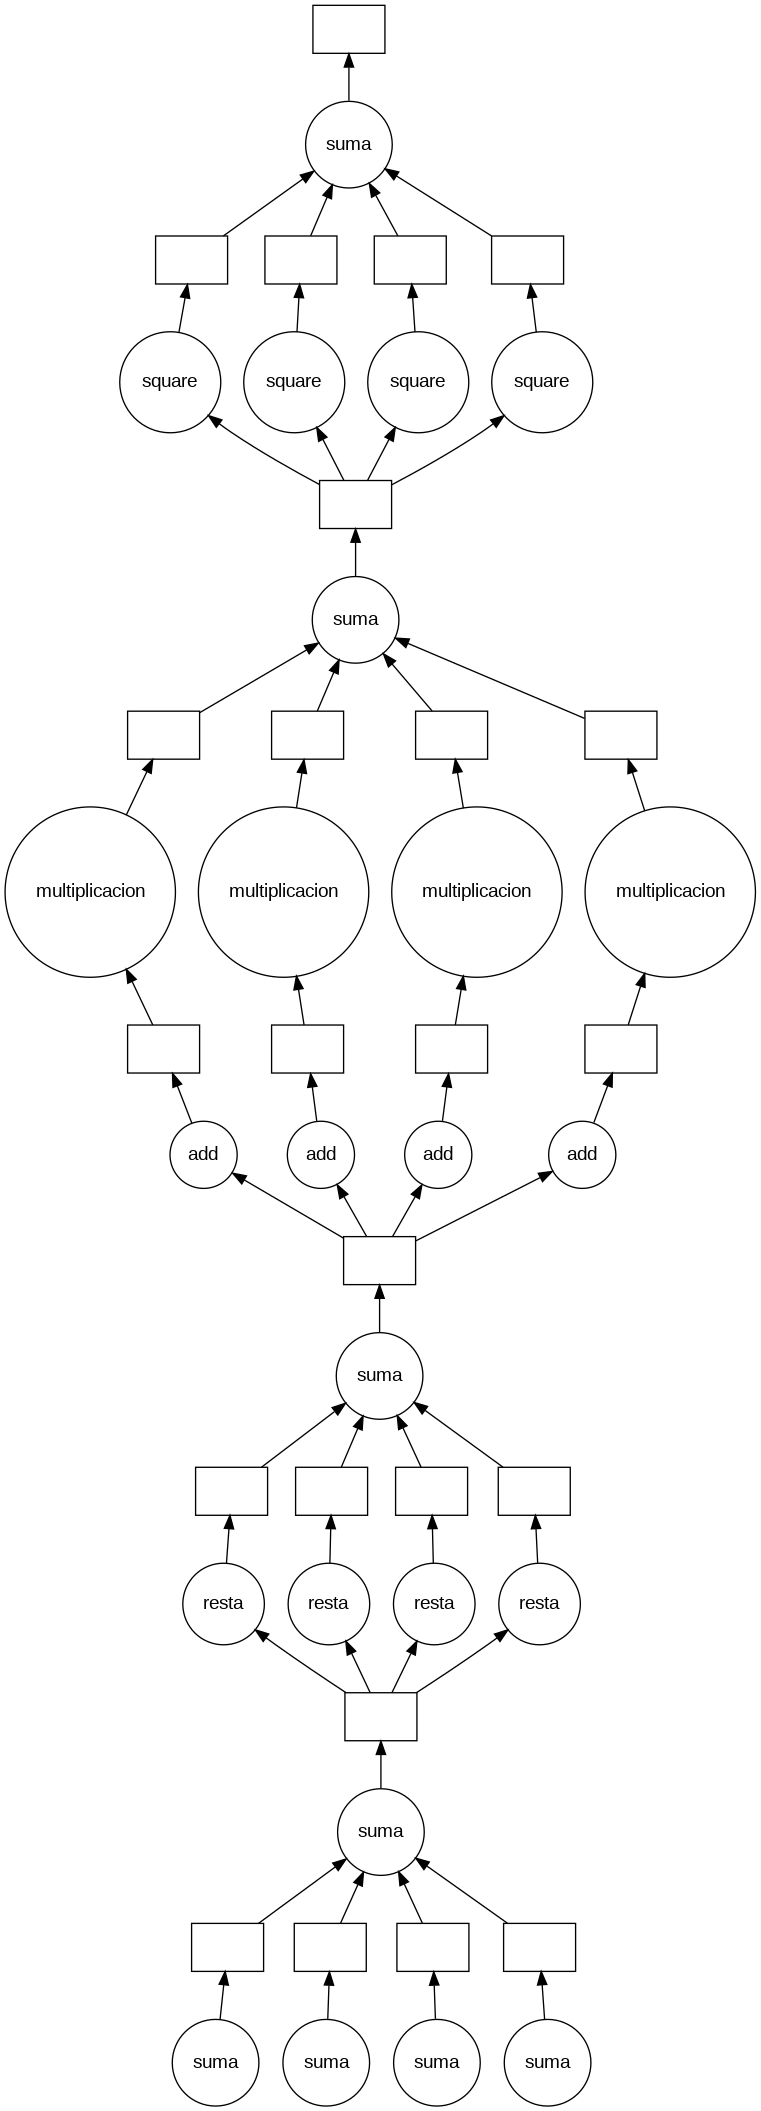

In [53]:
ec1 = [delayed(suma)(i) for i in comp]
total = delayed(suma)(ec1)

comp2 = [delayed(resta)(k, total) for k in comp]
tot2 = delayed(suma)(comp2)

comp3 = [delayed(multiplicacion)(k,tot2+k) for k in comp]
tot3 = delayed(suma)(comp3)

comp4 = [delayed(square)(k,tot3) for k in comp]
tot4 = delayed(suma)(comp4)

tot4.visualize()